## STEP 1: Libraries Import

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report


## STEP 2: Dataset Load

In [13]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df  = pd.read_csv('fashion-mnist_test.csv')

X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 784) (60000,)
(10000, 784) (10000,)


## STEP 3: Preprocessing

In [14]:
# Reshape + Normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


## STEP 4: Visualize Sample Images

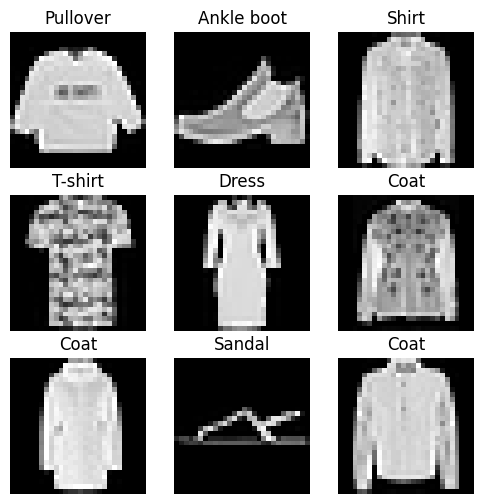

In [15]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()


## STEP 5: CNN Model

In [16]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


c:\Users\f\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,266 (501.04 KB)

 Trainable params: 128,266 (501.04 KB)

 Non-trainable params: 0 (0.00 B)

## STEP 6: Compile Model

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


## STEP 7: Early Stopping (Overfitting Control)

In [18]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


## STEP 8: Train Model

In [19]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 71ms/step - accuracy: 0.7303 - loss: 0.7275 - val_accuracy: 0.8183 - val_loss: 0.4986
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.8287 - loss: 0.4703 - val_accuracy: 0.8525 - val_loss: 0.4117
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8537 - loss: 0.4028 - val_accuracy: 0.8581 - val_loss: 0.3808
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8674 - loss: 0.3599 - val_accuracy: 0.8712 - val_loss: 0.3564
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.8783 - loss: 0.3313 - val_accuracy: 0.8633 - val_loss: 0.3632
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8869 - loss: 0.3067 - val_accuracy: 0.8861 - val_loss: 0.3115
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.8967 - loss: 0.2821 - val_accuracy: 0.8887 - val_loss: 0.3137
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9024 - loss: 0.2652 - 

## STEP 9: Training Curves (Loss & Accuracy)

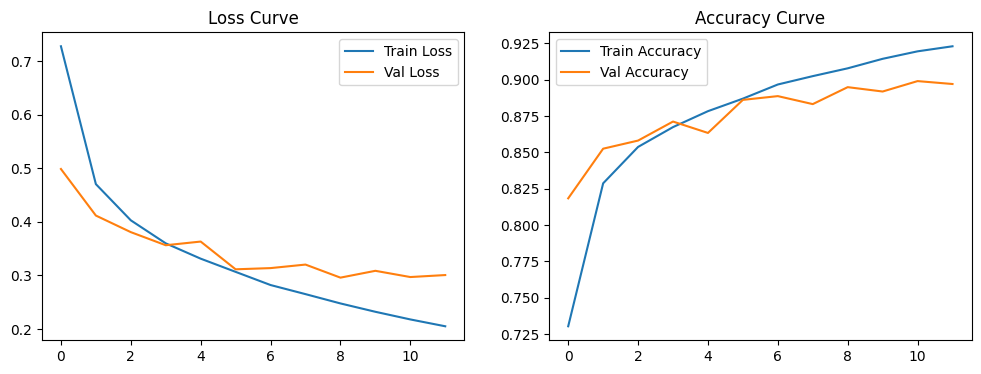

In [23]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()




## STEP 10: Model Evaluation

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8980 - loss: 0.2720
Test Accuracy: 0.8980000019073486


## STEP 11: Predictions

In [26]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


## STEP 12: Confusion Matrix

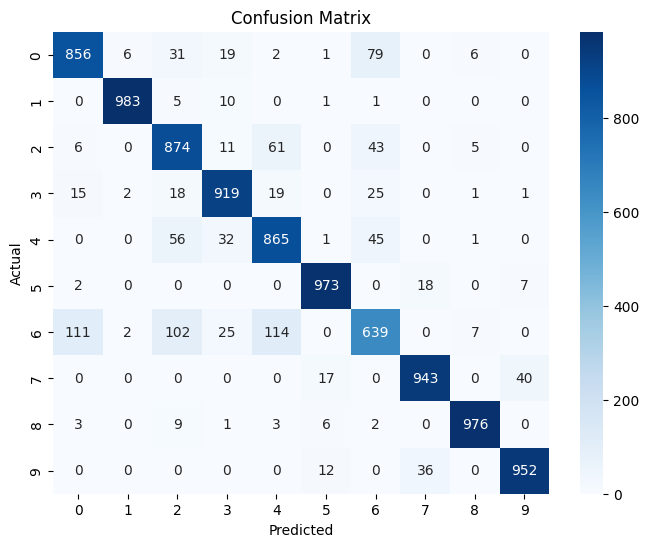

In [27]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## STEP 13: Classification Report

In [28]:
print(classification_report(y_true, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

     T-shirt       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.80      0.87      0.83      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.81      0.86      0.84      1000
      Sandal       0.96      0.97      0.97      1000
       Shirt       0.77      0.64      0.70      1000
     Sneaker       0.95      0.94      0.94      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## STEP 14: Sample Predictions

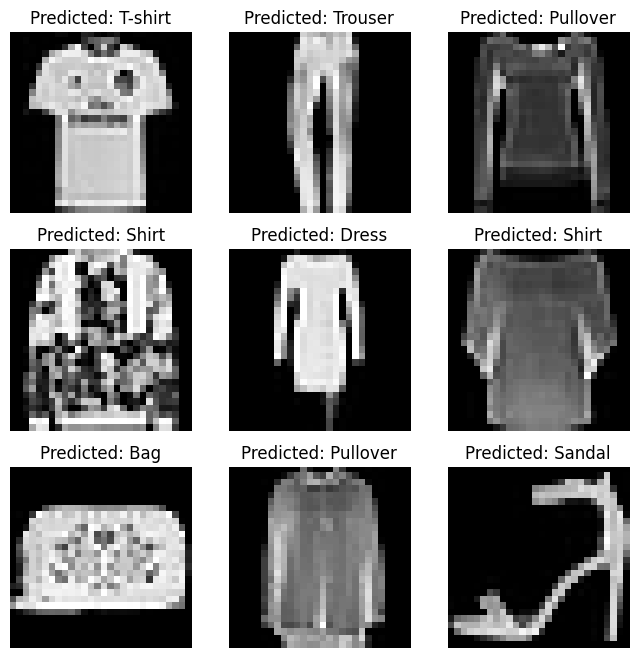

In [29]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title("Predicted: " + class_names[y_pred_classes[i]])
    plt.axis('off')
plt.show()
